# Dataset :HR Analytics

Target: target

Type: Binary Classification

**Real-World Context**:

Companies invest in training employees. Predicting whether employees are likely to change jobs helps organizations reduce attrition and hiring costs.

**Problem Statement:**

Predict whether a data scientist is looking for a job change based on demographic, education, and professional attributes.

**Business Relevance:**

Helps HR departments:

Identify retention risks

Optimize hiring strategy

Allocate training budgets effectively

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("aug_train.csv")

print(df.shape)
df.head()

(19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Missing Value Analysis

In [4]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [7]:
# define feature groups

target="target"
numerical_cols=["city_development_index","training_hours"]
categorical_cols=["city","gender","relevent_experience","enrolled_university","education_level","major_discipline","company_size","company_type","last_new_job"]

In [10]:
# for categorical columns fill with "unknown"
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")


In [6]:
df=df.drop(columns=["enrollee_id"]) # drop identifier column

In [12]:
df["experience"].isnull().sum()


np.int64(65)

In [13]:
df["experience"] = df["experience"].replace({">20": 21, "<1": 0})


In [14]:
df["experience"] = pd.to_numeric(df["experience"], errors="coerce")


In [15]:
df["experience"] = df["experience"].fillna(df["experience"].median())


In [18]:
df["city"].nunique()


123

In [21]:
df["target"].value_counts(normalize=True)*100


,proportion
target,
0.0,75.065247
1.0,24.934753


The dataset shows moderate class imbalance (75% vs 25%). Accuracy alone may not reflect model performance effectively. Evaluation metrics such as F1-score and ROC-AUC should be considered.

In [22]:
df = df.drop(columns=["city"])
categorical_cols.remove("city")


The city feature contains 123 unique categories, leading to high cardinality.Therefore, it was removed to maintain model simplicity.

# Exploratory Data Analysis

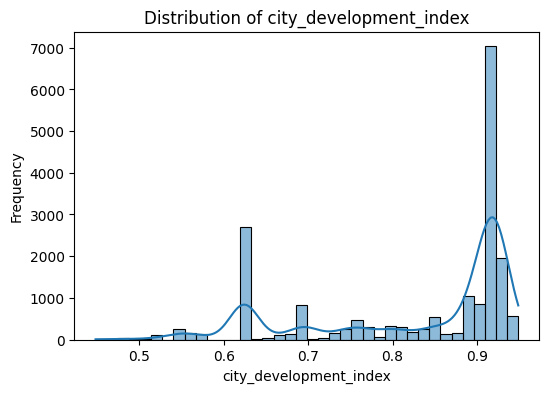

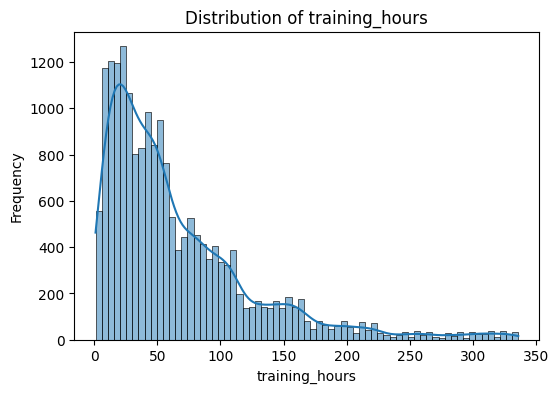

In [23]:
# Distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


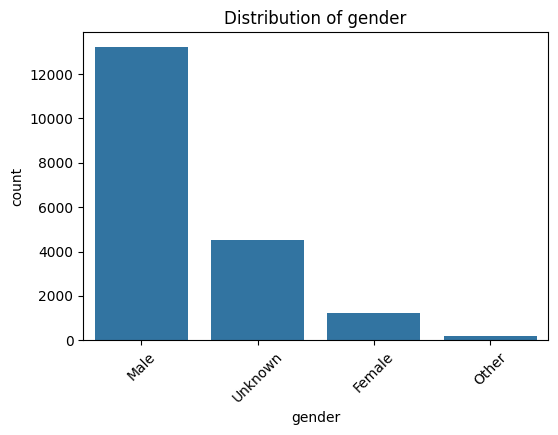

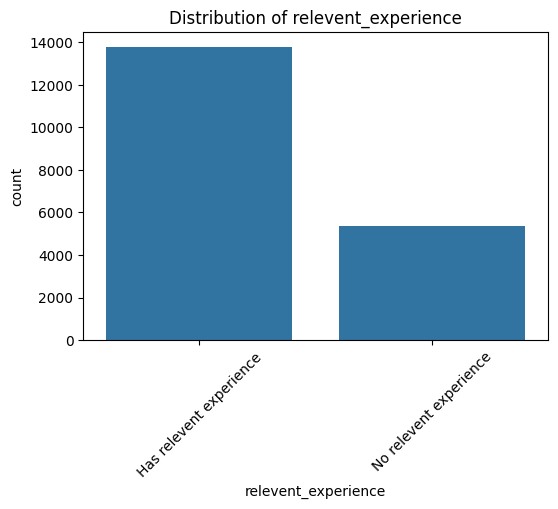

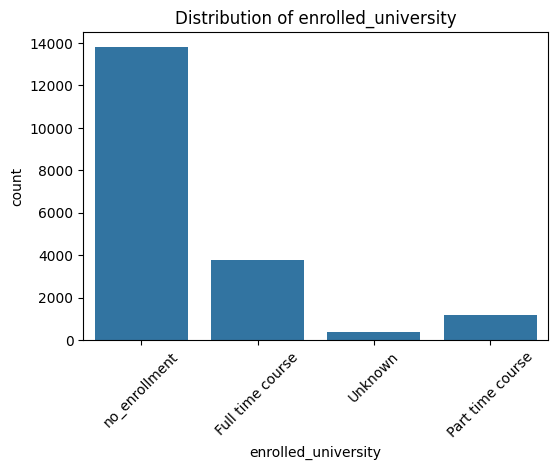

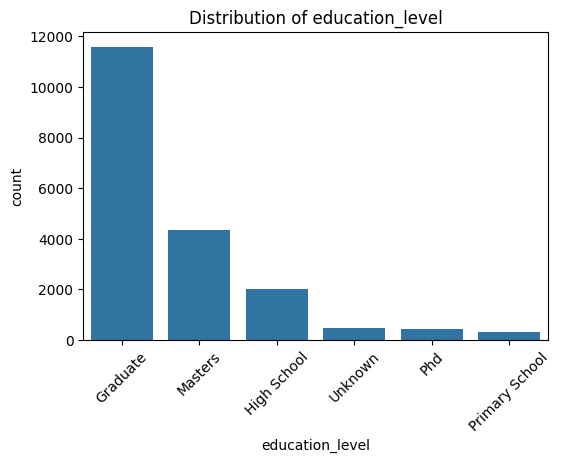

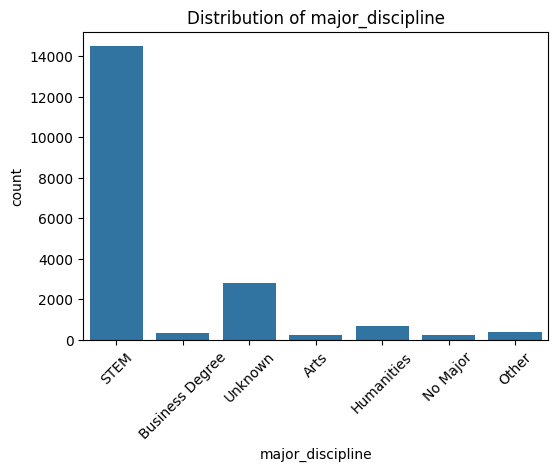

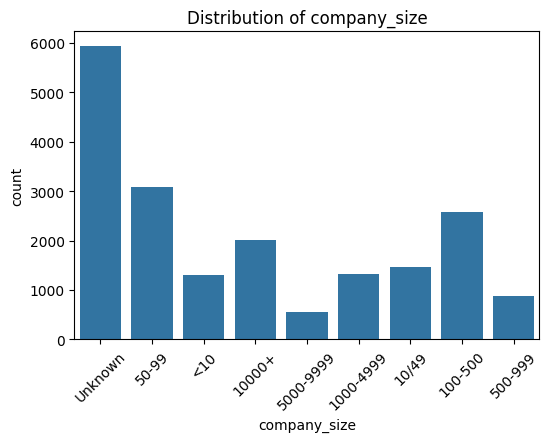

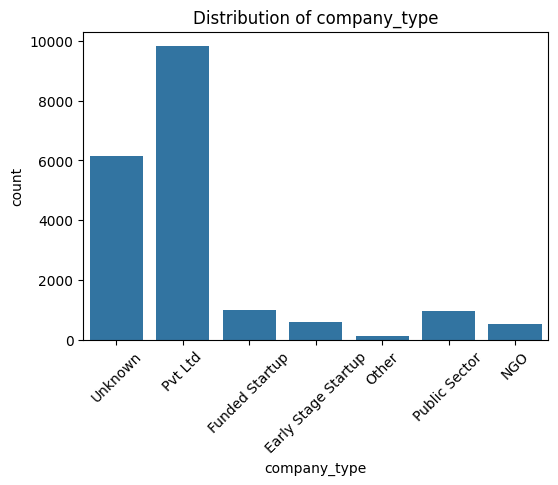

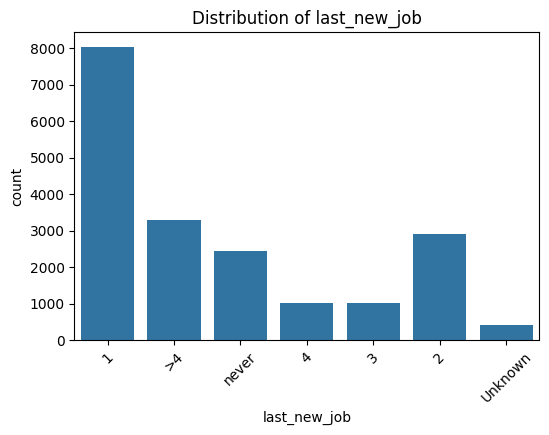

In [24]:
# Count plot
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


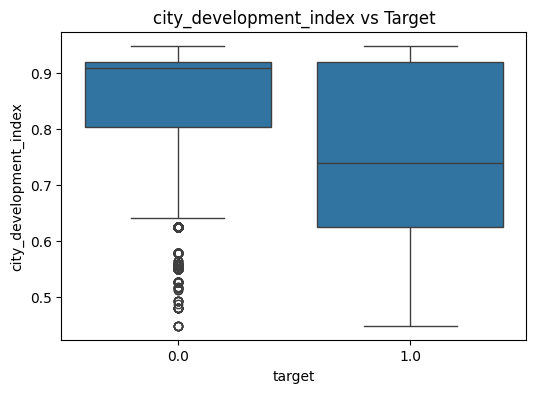

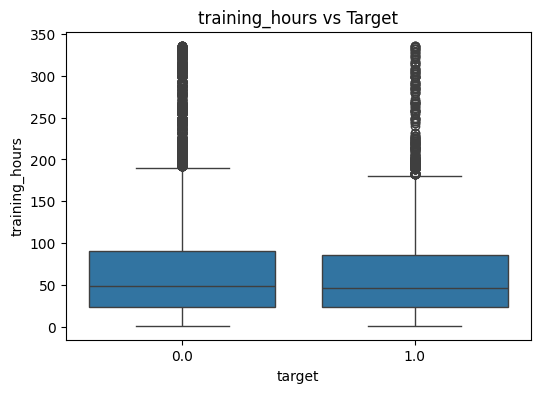

In [25]:
# Feature vs Target
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs Target")
    plt.show()


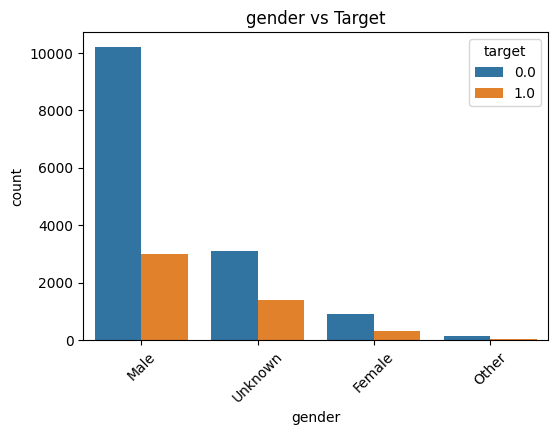

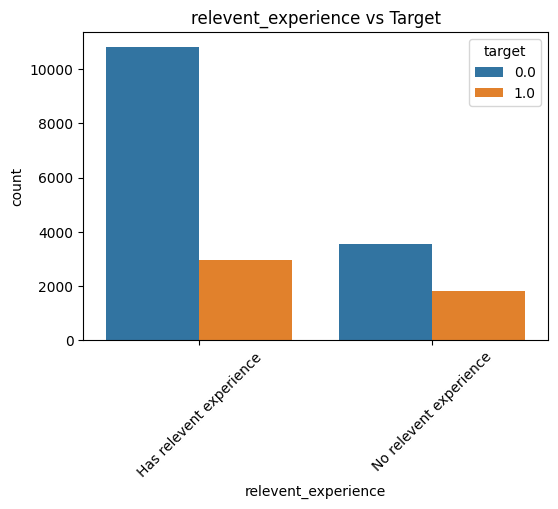

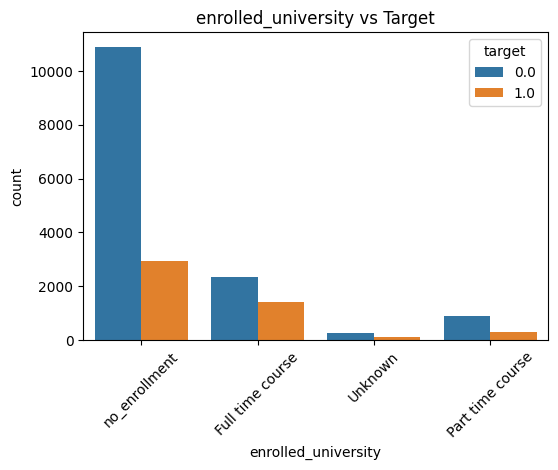

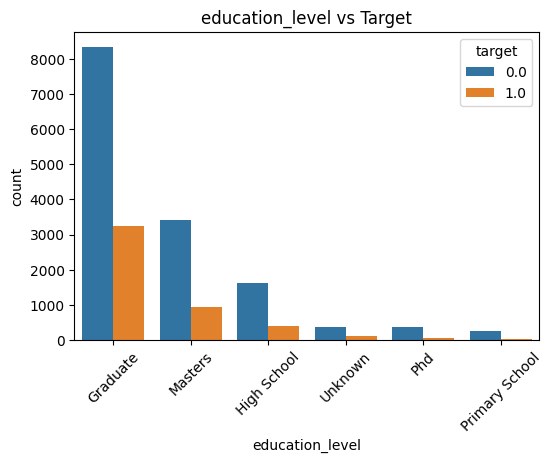

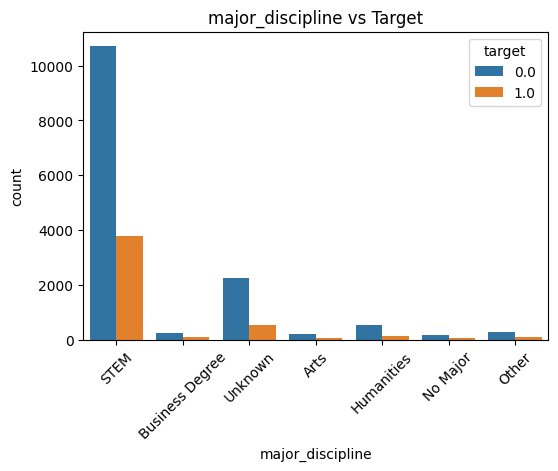

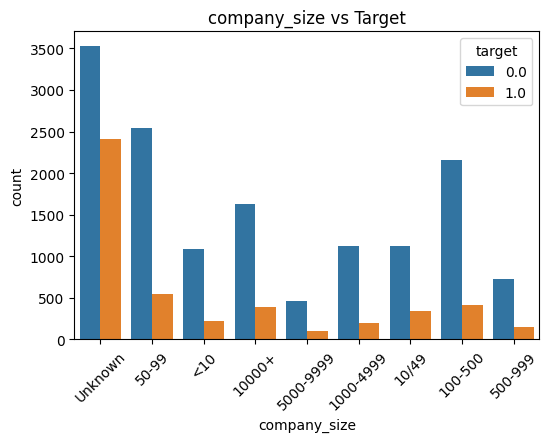

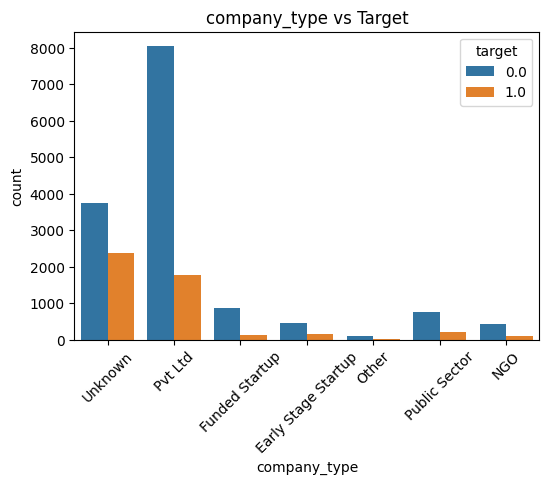

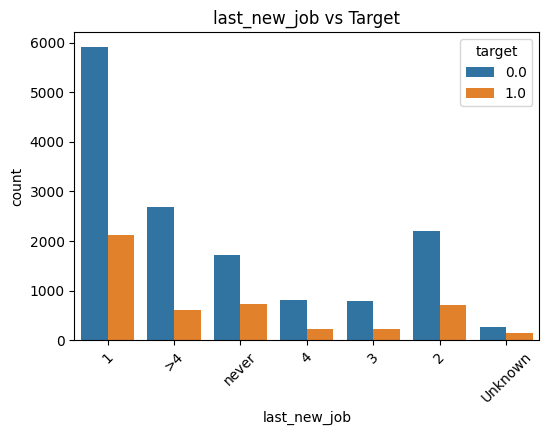

In [28]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="target", data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Target")
    plt.show()


In [29]:
len(categorical_cols)


8

In [30]:
for col in categorical_cols:
    print(col, ":", df[col].nunique())


gender : 4
relevent_experience : 2
enrolled_university : 4
education_level : 6
major_discipline : 7
company_size : 9
company_type : 7
last_new_job : 7


In [31]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)# One- Hot Encoding is used.drop_first=True is used to reduce multicollinearity


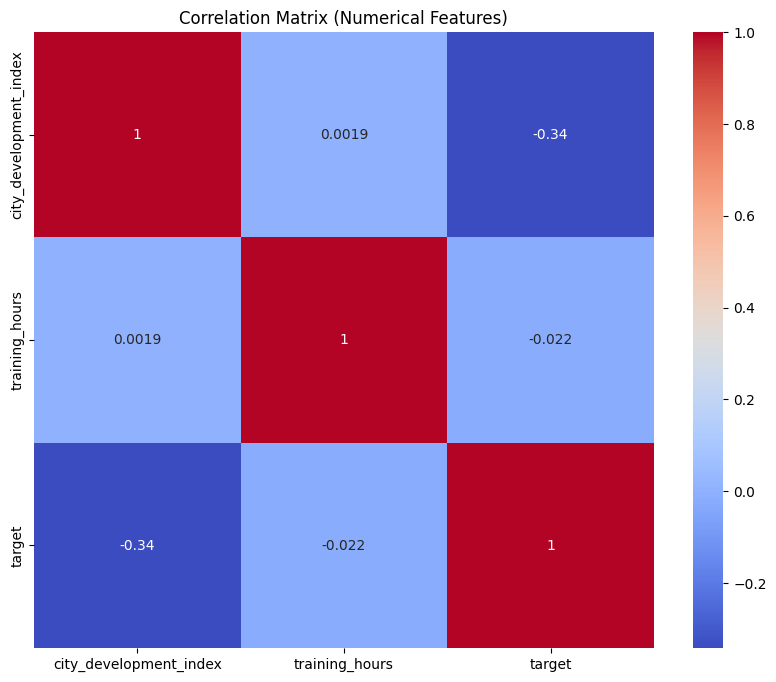

In [33]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols + ["target"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
# scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [37]:
readme_content = """
# HR Analytics – Job Change of Data Scientists
Data Preprocessing & Visualization

## Dataset Source
Kaggle – HR Analytics Job Change of Data Scientists
Link: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

Dataset Size: 19,158 rows (training dataset used)

---

## Problem Statement
The objective is to predict whether a data scientist is likely to change jobs based on demographic, education, and professional attributes.

Target Variable:
0 → Not looking for job change
1 → Looking for job change

This is a binary classification problem.

---

## Summary of Preprocessing Decisions

• Removed enrollee_id as it is an identifier.
• Converted experience column from mixed values (">20", "<1") to numeric format.
• Imputed missing experience values using median.
• Replaced missing categorical values with "Unknown" to preserve dataset size.
• Removed city column due to high cardinality (123 unique values).
• Applied One-Hot Encoding to remaining categorical variables.
• Performed train-test split before scaling to prevent data leakage.
• Standardized numerical features using StandardScaler.

---

## Key Insights & Observations

• Less experienced candidates are more likely to change jobs.
• Employees from smaller companies show higher job-switch intent.
• Higher city development index is associated with lower job change probability.
• Training hours show limited separation between classes.
• The dataset has moderate class imbalance (~75% vs 25%).

---

## Potential Next Modeling Steps

• Train Logistic Regression and Random Forest models.
• Use class weighting to handle imbalance.
• Evaluate using ROC-AUC, Precision, Recall, and F1-score.
• Perform feature importance analysis.
• Create experience bins (0–2, 3–5, 6–10, 10+).
• Explore interaction features such as experience × company_size.
"""

with open("README.md", "w") as f:
    f.write(readme_content)

print("README.md file created successfully.")


README.md file created successfully.
